# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [38]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
pd.set_option('mode.chained_assignment', None)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [39]:
# importing the dataset
bike_df=pd.read_csv("SeoulBikeData.csv")
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


In [40]:
# Getting the general information on the dataset about each column/ feature, total number of features, data count and data types.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [41]:
# Getting statistical data about each feature
bike_df.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


In [42]:
# Getting a general understanding about the the values in the dataset
print(f'Unique count of dates: ',bike_df['Date'].nunique())
print(f'Unique count of hours: ',bike_df['Hour'].nunique())
print(f'Unique count of temperatures: ',bike_df['Temperature (C)'].nunique())
print(f'Unique count of humidity: ',bike_df['Humidity (%)'].nunique())
print(f'Unique count of windspeeds ',bike_df['Wind speed (m/s)'].nunique())
print(f'Unique count of visibility limits: ',bike_df['Visibility (10m)'].nunique())
print(f'Unique count of dew points: ',bike_df['Dew point temperature (C)'].nunique())
print(f'Unique count of solar radiations: ',bike_df['Solar Radiation (MJ/m2)'].nunique())
print(f'Unique count of rainfall amounts: ',bike_df['Rainfall(mm)'].nunique())
print(f'Unique count of snowfall amounts: ',bike_df['Snowfall (cm)'].nunique())
print(f'Unique values of seasons: ',bike_df['Seasons'].unique())
print(f'Unique values of holidays: ',bike_df['Holiday'].unique())
print(f'Unique values of functioning days: ',bike_df['Functioning Day'].unique())

Unique count of dates:  365
Unique count of hours:  25
Unique count of temperatures:  547
Unique count of humidity:  93
Unique count of windspeeds  66
Unique count of visibility limits:  1791
Unique count of dew points:  556
Unique count of solar radiations:  345
Unique count of rainfall amounts:  62
Unique count of snowfall amounts:  52
Unique values of seasons:  ['Winter' 'Spring' 'Summer' 'Autumn']
Unique values of holidays:  ['No Holiday' 'Holiday']
Unique values of functioning days:  ['Yes' 'No']


**Comments** :
<br>
Through doing the above steps we are able to have better understanding about the dataset we'll be handling, like the different data types -float64, int64 and object. Now we could perform the necessary data preprocessing and then some encoding to be able to perform the required prediction.

### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

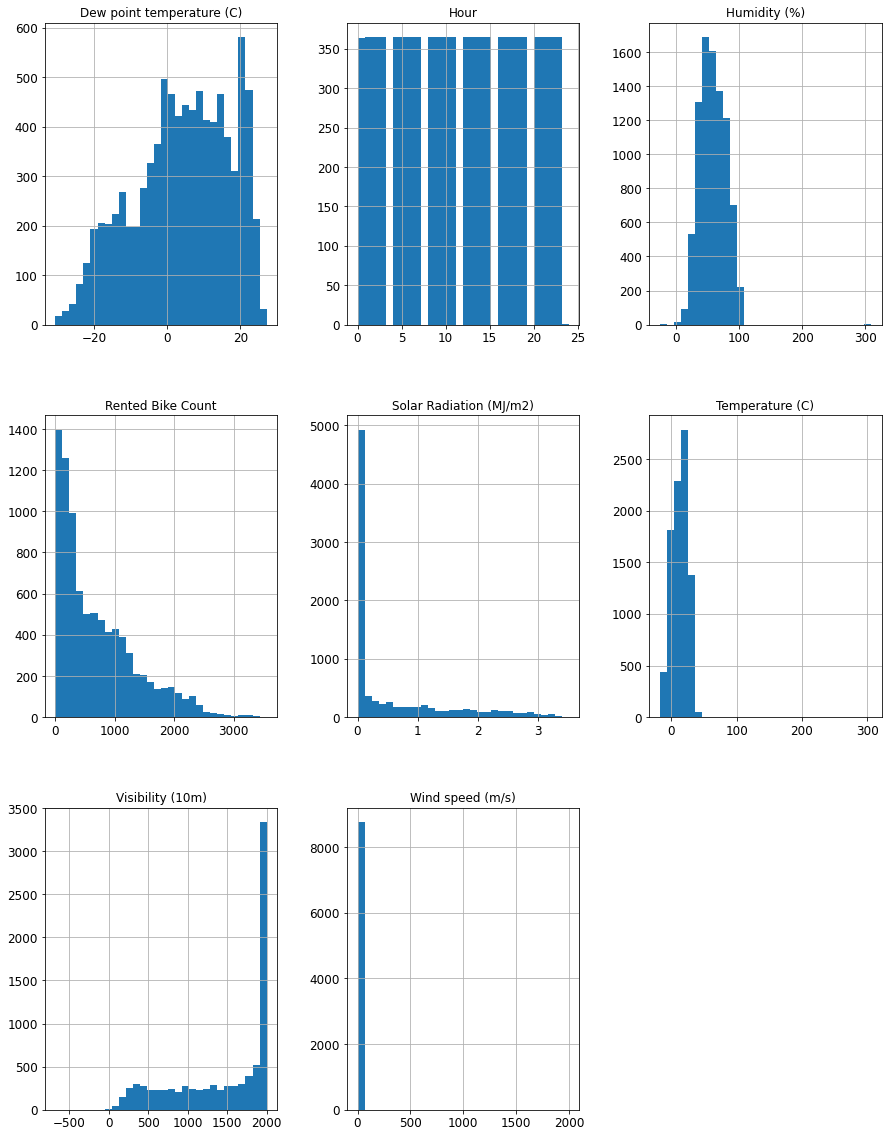

In [43]:
### Your code here
# Getting a better visual perception
visual_hist = bike_df.hist(bins=30,figsize=(15,20))
plt.show()

**Comments** :
<br>
Using the pandas library we are able to get the initial perception about the data, the represention here is only of the numerical data in the data set (int64, float64). Based on the above graphical information we are able to observe that there are features that are normally distributed, left/right skewed and some with extremities.

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [44]:
# seperating rows that were a functioning day from non functional days.
bike_df_fun=bike_df.loc[bike_df["Functioning Day"]=='Yes']
bike_df_nonFun=bike_df.loc[bike_df["Functioning Day"]=='No']
print(f'No. of days with bike rental on a non-functional day: ',len(bike_df_nonFun.loc[bike_df_nonFun['Rented Bike Count']>0]))
print(f'No. of days with bike rental on a functional day: ',len(bike_df_fun.loc[bike_df_fun['Rented Bike Count']>0]))

No. of days with bike rental on a non-functional day:  0
No. of days with bike rental on a functional day:  8465


In [45]:
# Dropping the functioning day column as now it is redundant.
bike_df_fun.drop(columns=["Functioning Day"],inplace=True,axis=1)
bike_df_fun.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday


**Comments**:
<br>
This process helps to remove redundant rows and columns.

### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [46]:
### Your code here
# bike_df_fun['Holiday']=np.where(bike_df_fun['Holiday']=='No Holiday',0,1)
bike_df_fun['Holiday']=bike_df_fun['Holiday'].map({'Holiday':1,'No Holiday':0})
bike_df_fun.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [47]:
### Your code here
# Getting the unique values in seasons column and creating a seperate column for each unique value by recoding them respectively.
season_dummy=pd.get_dummies(bike_df_fun['Seasons']).applymap(np.int64)

# Concatanating them with the mand dataframe.
bike_df_seasons=pd.concat([bike_df_fun,season_dummy],axis=1)

# Dropping the seasons column
bike_df_seasons.drop(columns=['Seasons'],inplace=True)
display(bike_df_seasons.head())
display(bike_df_seasons.info())

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Holiday                    8465 non-null   int64  
 12  Autumn                     8465 non-null   int64  
 13  Spring                     8465 non-null   int64

None

It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [48]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:
bike_df_weekday=bike_df_seasons.copy()

# Transforming the date column to weekday column (0,1)
bike_df_weekday['Date']=bike_df_seasons['Date'].transform(lambda x: date_is_weekday(x))

# Renaming the column Date to Weekday
bike_df_weekday.rename(columns={"Date":"Weekday"},inplace=True)
bike_df_weekday.head()

,Weekday,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Winter
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,0,0,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,0,0,0,1
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,0,0,0,1
3,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,0,0,0,1
4,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,0,0,0,1


**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

In [49]:
### Your code here
# Identifying features that need to undergo numerical conversion
bike_df_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Holiday                    8465 non-null   int64  
 12  Autumn                     8465 non-null   int64  
 13  Spring                     8465 non-null   int64

In [50]:
bike_df=bike_df_weekday.copy()

# Converting the object datatypes to numeric
bike_df['Rainfall(mm)']=pd.to_numeric(bike_df_weekday['Rainfall(mm)'], errors='coerce')
bike_df['Snowfall (cm)']=pd.to_numeric(bike_df_weekday['Snowfall (cm)'], errors='coerce')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Autumn                     8465 non-null   int64  
 13  Spring                     8465 non-null   int64

**Comments**:
<br>
All features have been either encoded or converted to numerical type. Although, the rainfall and snowfall features posses NaN values which will be needed to be processed.

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A925CB198>,
      dtype=object)

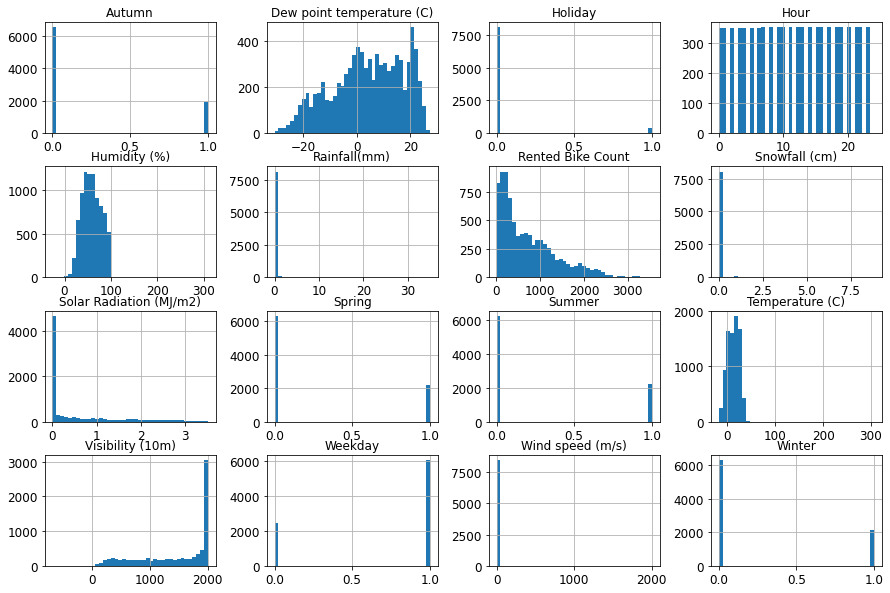

In [51]:
### Your code here
# using histograms
bike_df.hist(bins=40, figsize=(15,10))

Weekday


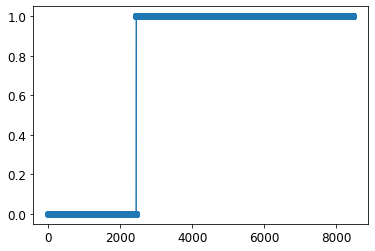

Rented Bike Count


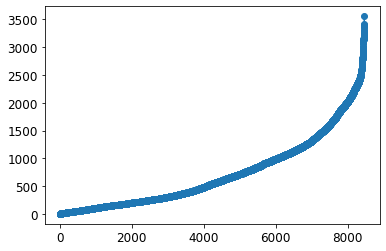

Hour


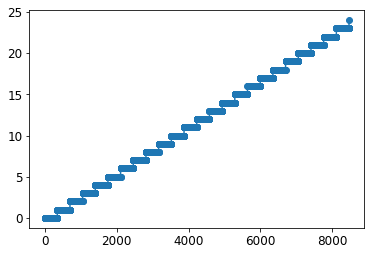

Temperature (C)


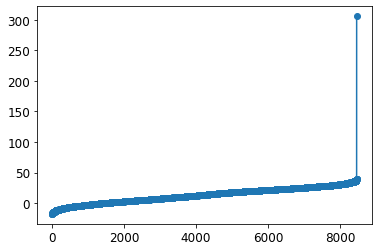

Humidity (%)


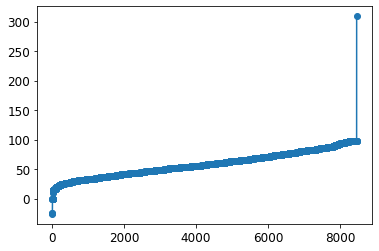

Wind speed (m/s)


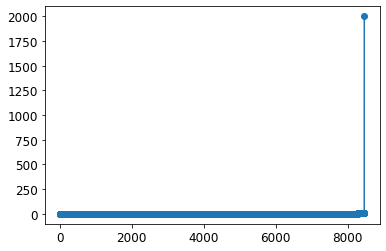

Visibility (10m)


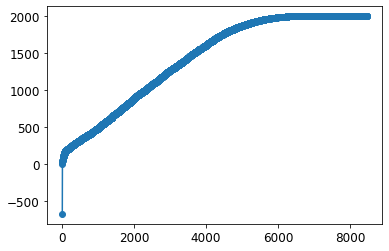

Dew point temperature (C)


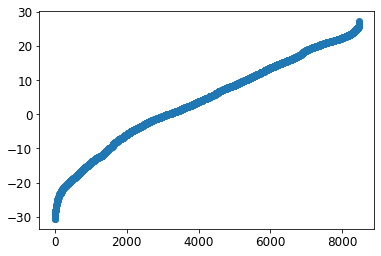

Solar Radiation (MJ/m2)


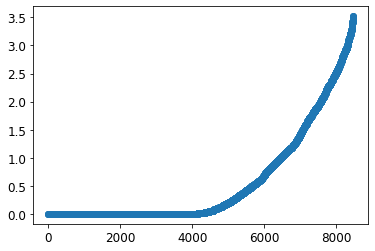

Rainfall(mm)


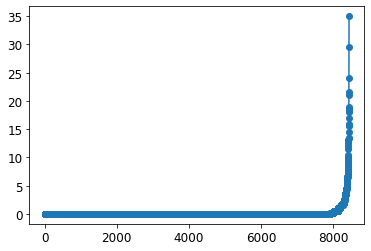

Snowfall (cm)


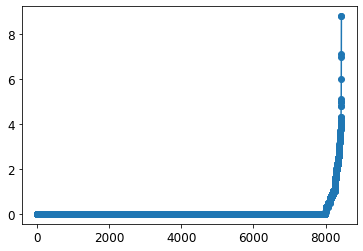

Holiday


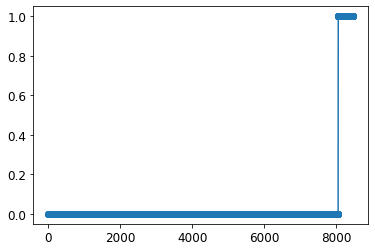

Autumn


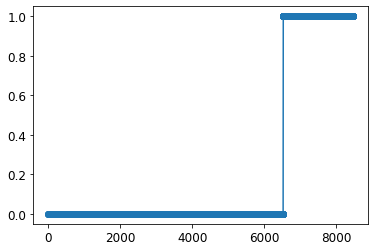

Spring


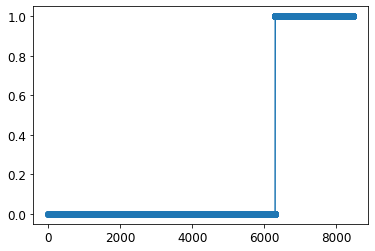

Summer


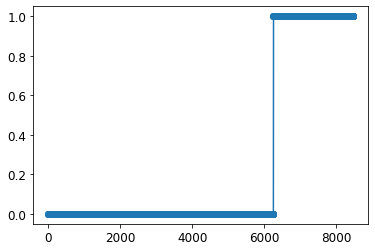

Winter


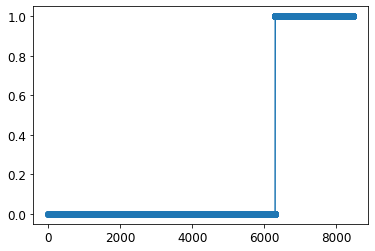

In [52]:
for feat in bike_df.columns:
    print(f'{feat}')
    plt.plot(np.sort(bike_df.loc[:,feat]),'-o')
    plt.show()

In [53]:
### Your summary sentence about problematic entries

**Comments**:
<br>
By using the graphical visualisation it can be observed that certain features in the dataframe need to be normalized as there are extremtities that can skew the final results of the model.

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [54]:
# Identifying features with Nan values prior to imputation
bike_df.isna().sum()

Weekday                       0
Rented Bike Count             0
Hour                          0
Temperature (C)               0
Humidity (%)                  0
Wind speed (m/s)              1
Visibility (10m)              0
Dew point temperature (C)     1
Solar Radiation (MJ/m2)       0
Rainfall(mm)                 25
Snowfall (cm)                23
Holiday                       0
Autumn                        0
Spring                        0
Summer                        0
Winter                        0
dtype: int64

In [55]:
### Your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# identifying the outliers and replacing them with NaN
def iqr(feature):
    q1=bike_df[feature].quantile(0.25)
    q3=bike_df[feature].quantile(0.75)
    iqr=q3-q1
    lower_lim=q1-1.5*iqr
    upper_lim=q3+1.5*iqr
    return lower_lim,upper_lim

def outlier(features):
    for feat in features:
        lim=iqr(feat)
        bike_df.loc[(bike_df[feat]<lim[0]) | (bike_df[feat]>lim[1]),feat]=np.nan

# normalizing the features which may skew the models.
bike_df['Solar Radiation (MJ/m2)']=np.where(bike_df['Solar Radiation (MJ/m2)']>0,1,0)
bike_df['Visibility (10m)']=np.where(bike_df['Visibility (10m)']<2000,0,1)

feature=['Temperature (C)','Humidity (%)','Wind speed (m/s)']
outlier(feature)

# building the pipeline
pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [56]:
# Rechecking
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Weekday                    8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8464 non-null   float64
 4   Humidity (%)               8461 non-null   float64
 5   Wind speed (m/s)           8309 non-null   float64
 6   Visibility (10m)           8465 non-null   int32  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   int32  
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Autumn                     8465 non-null   int64  
 13  Spring                     8465 non-null   int64

**Comments**:
<br>
There were more than 2 features(Rainfall(mm) & Snowfall (cm)) that had Nan values. The pipeline will bring them to the same scale.

### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [57]:
### Your code here
# making a temporary version of the preprocessed data.
feat=bike_df.drop(['Rented Bike Count'],axis=1)
labels=bike_df['Rented Bike Count'].copy()
preprocessing=pipeline.fit(feat,labels)
transform=preprocessing.transform(feat)
preprocess=pd.DataFrame(transform)

In [58]:
### Your written answer here


**Comments**:
<br>
Here the dataset has yet to be split into training and tests sets.

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

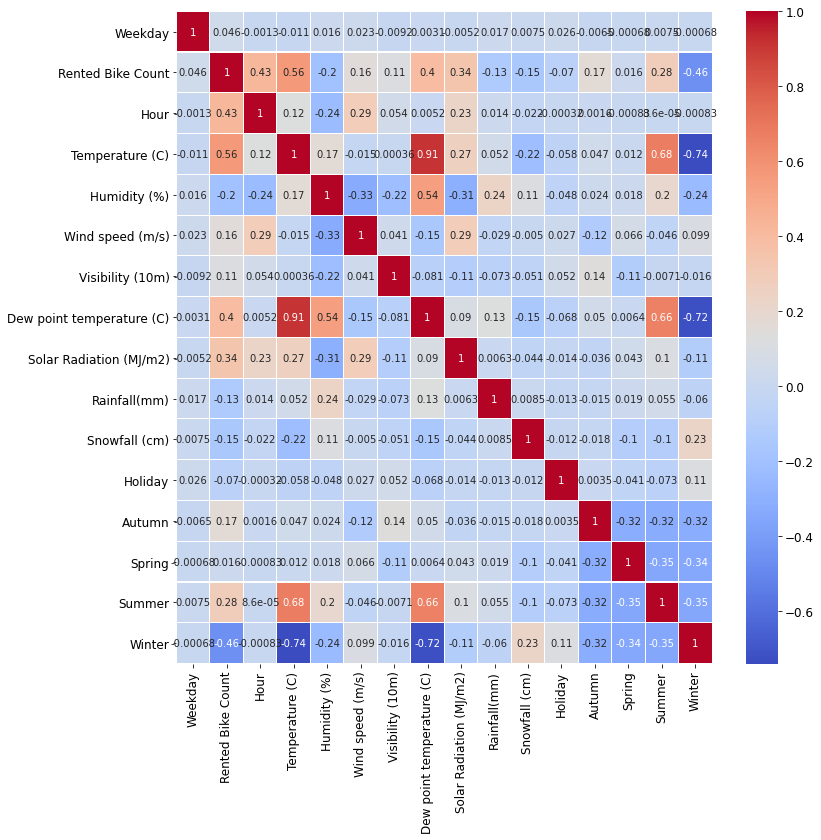

In [59]:
### Your code here
import seaborn as sns
# corr=preprocess.corr()
corr=bike_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

The 3 attributes with most correlated with bike rental
<br>
| Correlated feature        | Value         |
| ------------------------- | ------------- |
| Hour                      | 0.53          |
| Temperature (C)           | 0.43          |
| Dew point temperature (C) | 0.4           |

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [60]:
### Your code here
from sklearn.model_selection import train_test_split

# splitting the dataset into train and test sets
x_train,x_test,y_train,y_test = train_test_split(feat,labels,test_size=0.2,random_state=20)

from sklearn.linear_model import LinearRegression

# modifying and appending to previously created pipeline
pipeline.steps.append(['linearRegression', LinearRegression()])

In [61]:
from sklearn.metrics import mean_squared_error

# Calculating the RMSE when all predictions were equal to the mean of the training targets.
pipeline.fit(x_train,y_train)
targetMean=y_train.mean()
y_trainMean=[targetMean]*len(y_train)
print(f'RMSE with mean baseline on training set:',mean_squared_error(y_trainMean, pipeline.predict(x_train),squared=False))

RMSE with mean baseline on training set: 477.6320039119253


Training RMSE:  433.0217379024133
Test RMSE:  427.4361491703223


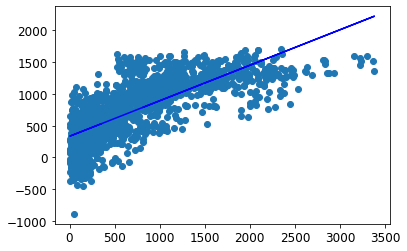

In [67]:
# Linear Regression pipeline prediction for training and test data.
pipeline.fit(x_train,y_train)
training_rmse= mean_squared_error(y_train, pipeline.predict(x_train),squared=False)
test_rmse= mean_squared_error(y_test, pipeline.predict(x_test),squared=False)
print(f'Training RMSE: ',training_rmse)
print(f'Test RMSE: ', test_rmse)

# linear_regression=LinearRegression()
# linear_regression.fit(x_train,y_train)
# predict=linear_regression.predict(x_train)
predict=pipeline.predict(x_test)

plt.scatter(y_test,predict)
fit_line=np.polyfit(y_test,predict,deg=1)
line_fit=np.poly1d(fit_line)
plt.plot(y_test, line_fit(y_test),color='blue')

In [26]:
print("Target Mean of training set: ",np.mean(pipeline.predict(x_train)))
print("Target Mean of test set: ", np.mean(pipeline.predict(x_test)))

Target Mean of training set:  729.8242001502359
Target Mean of test set:  742.2168463404308


Show an appropriate **visualisation of the fit for your linear regression.**

In [29]:
### Your code here
from sklearn.model_selection import learning_curve

def sketchLearningCurve(pipeline,x,y, cv=10, n_jobs=1):
    train_sizes, train_scores, test_scores = learning_curve(pipeline, x, y, cv=cv, n_jobs=n_jobs)
    training_mean = np.mean(train_scores, axis=1)
    training_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

# plotting the training accuracy against cross validation accuracy
    plt.plot(train_sizes, training_mean, color='blue', marker='o',markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, training_mean+training_std, training_mean-training_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
    plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
    plt.title('Learning curve')
    plt.xlabel('Training Data size')
    plt.ylabel('Model Accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show

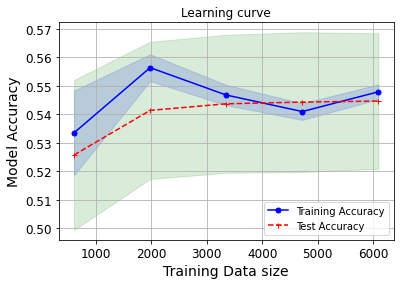

In [30]:
sketchLearningCurve(pipeline,x_train,y_train)

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

Train RMSE:  847.9072512249513
Test RMSE:  834.6872462938173


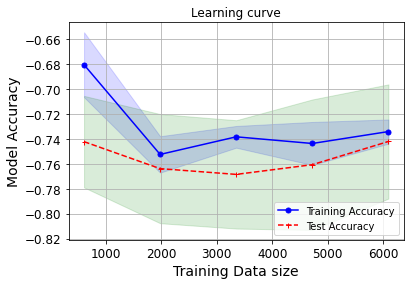

In [31]:
### Your code here
from sklearn.kernel_ridge import KernelRidge
KRPipe=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ('kernerlR', KernelRidge(alpha=1.0))
])
KRPipe.fit(x_train, y_train)

sketchLearningCurve(KRPipe, x_train, y_train)

KRTrain_rmse=mean_squared_error(y_train, KRPipe.predict(x_train),squared=False)
KRTest_rmse= mean_squared_error(y_test, KRPipe.predict(x_test), squared=False)
print(f'Train RMSE: ', KRTrain_rmse)
print(f'Test RMSE: ', KRTest_rmse)

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

Training RMSE:  535.0975224469554
Test RMSE:  527.176740258059


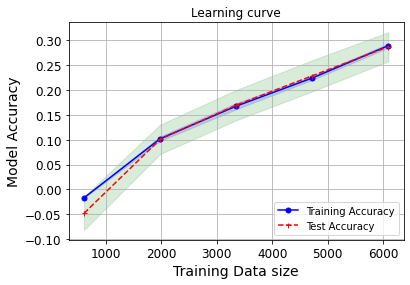

In [32]:
### Your code here
from sklearn.svm import SVR
svrPipe= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ('svr', SVR(C=1.0, epsilon=0.2))
])
svrPipe.fit(x_train,y_train)
sketchLearningCurve(svrPipe, x_train, y_train)

svrTrain_rmse=mean_squared_error(y_train, svrPipe.predict(x_train), squared=False)
svrTest_rmse=mean_squared_error(y_test, svrPipe.predict(x_test),squared=False)
print(f'Training RMSE: ', svrTrain_rmse)
print(f'Test RMSE: ', svrTest_rmse)

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [33]:
### Your code here
from sklearn.model_selection import cross_validate
def crossValidation(pipeline, x,y,score):
    scores=cross_validate(pipeline, X=x, y=y, cv=10, scoring=score, return_train_score=True)
    print(f'Cross Validation Score: ', scores['train_score'],
    '\n\nMean of RMSE splits: ',-np.mean(scores['train_score']),
    '\n\nStandard deviation of RMSE splits: ', np.std(scores['train_score']))

In [34]:
print('Linear Regression Model\n')
crossValidation(pipeline,x_train, y_train, 'neg_root_mean_squared_error')

Linear Regression Model

Cross Validation Score:  [-431.56259423 -434.2882102  -433.45790375 -431.1345873  -432.31018345
 -430.42885307 -430.93962874 -433.87933764 -434.37076856 -435.89503282] 

Mean of RMSE splits:  432.82670997619425 

Standard deviation of RMSE splits:  1.7169739738213963


In [35]:
print(f'Kernel Ridge Model')
crossValidation(KRPipe, x_train, y_train, 'neg_root_mean_squared_error')

Kernel Ridge Model
Cross Validation Score:  [-849.76762742 -848.02634631 -844.45809965 -844.73639255 -849.17173974
 -844.4365649  -844.20253991 -853.38391928 -847.58122562 -853.0097875 ] 

Mean of RMSE splits:  847.8774242889297 

Standard deviation of RMSE splits:  3.30034575366346


In [36]:
print(f'SVR Model')
crossValidation(svrPipe, x_train, y_train, 'neg_root_mean_squared_error')

SVR Model
Cross Validation Score:  [-542.23394801 -545.10031393 -543.87598856 -540.02034591 -542.59444631
 -538.89514071 -540.51539662 -543.06286655 -546.21670405 -545.50351075] 

Mean of RMSE splits:  542.8018661400721 

Standard deviation of RMSE splits:  2.3250285866992235


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [37]:
### Your answer here


**Comments**:
<br>
|   Model                   |   Dataset     |   Mean of RMSE    |   Standard Deviation  |
|---------------------------|---------------|-------------------|-----------------------|
|   Linear Regression Model |Training<br>Test<br>CrossValidation|433.022<br>427.436<br>432.827|<br><br>1.717|
|   Kernal Ridge Model      |Training<br>Test<br>CrossValidation|847.907<br>834.687<br>847.877|<br><br>3.3| 
|   SVR Model               |Training<br>Test<br>CrossValidation|535.098<br>527.177<br>542.802|<br><br>2.325|

<br>

* Based on the comparison of train,test and cross-validation set, it suggests that all models have failed to gain the general idea (underfitting) in overall comparison.
<br>

* But, after comparing the three models, the linear regression model has the lowest RMSE and standard deviation. This suggests that the trained model performed better with unseen data and noise, further suggesting that it was able to better capture the general idea in comparison with the other two models.

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [38]:
### Your code here
from sklearn.model_selection import GridSearchCV

parameters = {'svr__C':[0.1,1.5,5,10,20,40,80,99]}

modelGridSearch = GridSearchCV(svrPipe,parameters)
modelGridSearch.fit(x_train,y_train)

print(f'The best set of parameters are: ', modelGridSearch.best_params_['svr__C'])

The best set of parameters are:  99


Cross Validation Score:  [-328.53952182 -331.2069242  -329.82862018 -329.00302106 -330.11995795
 -331.11532742 -327.58410988 -330.53556331 -331.65247821 -333.51081206] 

Mean of RMSE splits:  330.3096336092409 

Standard deviation of RMSE splits:  1.6153159051625412
Training RMSE:  327.4965065277039
Test RMSE:  321.54534261240417


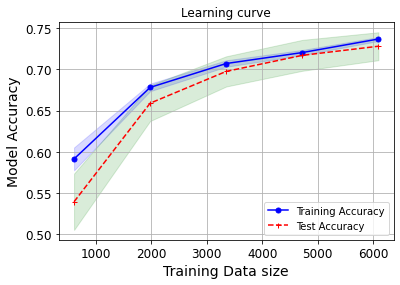

In [39]:
svrPipeUpdated= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ('svr', SVR(C=99.0, epsilon=0.2))
])

svrPipeUpdated.fit(x_train,y_train)
sketchLearningCurve(svrPipeUpdated, x_train, y_train)

svrTrain_rmse=mean_squared_error(y_train, svrPipeUpdated.predict(x_train), squared=False)
svrTest_rmse=mean_squared_error(y_test, svrPipeUpdated.predict(x_test),squared=False)
crossValidation(svrPipeUpdated, x_train, y_train, 'neg_root_mean_squared_error')
print(f'Training RMSE: ', svrTrain_rmse)
print(f'Test RMSE: ', svrTest_rmse)

**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [40]:
### Your answers here


**Comments**:
<br>
After fine tuning the hyper parameter for SVR (svr__C), it has performed much better giving it a much less RMSE in train, test and cross validation sets, along with a lesser standard deviation. The model accuracy has improved over time and reduced at the end. Suggesting that it has improved significantly in comparison to its intial performance but yet failed to identify the general idea of the dataset (underfitting).
|   Model                   |   Dataset     |   Mean of RMSE    |   Standard Deviation  |
|---------------------------|---------------|-------------------|-----------------------|
|   SVR Model               |Training<br>Test<br>CrossValidation|327.497<br>321.545<br>330.301|<br><br>1.615|

We could try to fine tune the other available parameters to see if it would improve any further.